🧑‍💻 Beginner Case Study: Student Performance Analysis

🎯 Scenario:
You are a data analyst at a small education company. They’ve collected data about students’ scores in Math, Reading, and Writing. They want insights like:

1. Which subject students perform best in?

2. Do students who read well also write well?

3. Are there gender-based differences in performance?

Data from :"https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/StudentsPerformance.csv"

In [ ]:
import pandas as pd
# First Step read csv file

df = pd.read_csv("StudentsPerformance.csv")

In [2]:
# Check shape, missing values, and data types

print("Data Frame Shape:",df.shape)
print("Mising Value:- \n",df.isnull().sum())

Data Frame Shape: (1000, 8)
Mising Value:- 
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [3]:
#What is the average score in Math, Reading, and Writing?
print("Average Math Score:", df['math score'].mean()) 
print("Average Math Score:",df['writing score'].mean()) 
print("Average Math Score:",df['reading score'].mean()) 

Average Math Score: 66.089
Average Math Score: 68.054
Average Math Score: 69.169


In [4]:
#What’s the highest and lowest score in each?
highMath=df['math score'].max()
lowMath=df['math score'].min()
print("Highest score for math:",highMath)
print("Lowest score for math:",lowMath)

highRead=df['reading score'].max()
lowRead=df['reading score'].min()
print("Highest score for reading:",highRead)
print("Lowest score for reading:",lowRead)

highWrite=df['writing score'].max()
lowWrite=df['writing score'].min()
print("Highest score for writing:",highWrite)
print("Lowest score for write:",lowWrite)

Highest score for math: 100
Lowest score for math: 0
Highest score for reading: 100
Lowest score for reading: 17
Highest score for writing: 100
Lowest score for write: 10


In [5]:
# What’s the average Math,reading,writing score by gender?

df.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


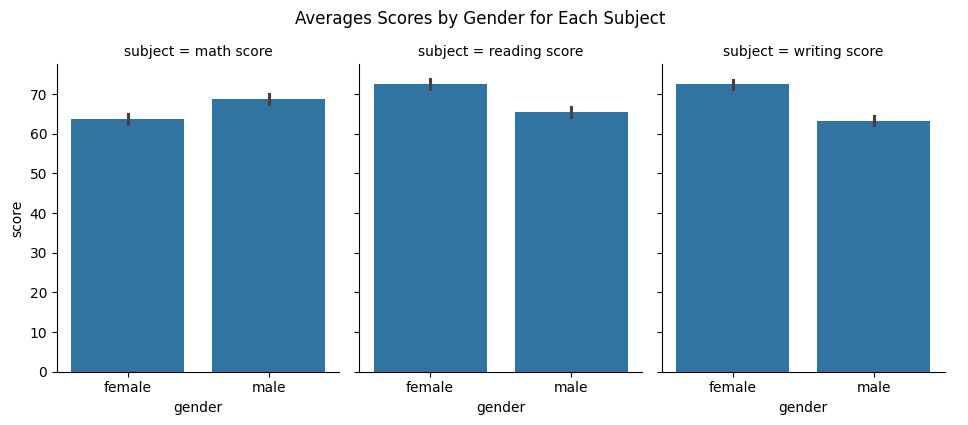

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the data to long format
df_melt = df.melt(id_vars='gender', value_vars=['math score', 'reading score', 'writing score'],
                  var_name='subject', value_name='score')

g = sns.catplot(x='gender', y='score', col='subject',
                data=df_melt, kind='bar', height=4, aspect=0.8)
g.fig.suptitle("Averages Scores by Gender for Each Subject", y=1.05)
plt.show()


Analysis Type	                  Example Use
Groupby Mean	                  Gender vs Score, Lunch vs Score
Correlation	                      Math vs Reading vs Writing
T-test	                          Gender or Prep course effect on score
ANOVA	                          Parental education vs score
Visualizations	                  Bar, Box, Violin, Heatmap

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


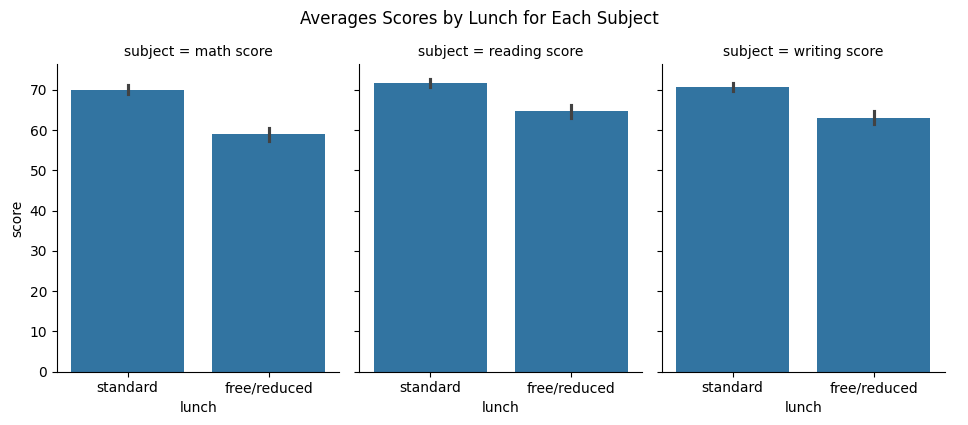

In [7]:
# Lunch vs Score

print(df.head())
df['lunch'].dtype
df['lunch'].unique()

df.groupby('lunch')[['math score','reading score','writing score']].mean()

# Melt the data to long format
df_melt = df.melt(id_vars='lunch', value_vars=['math score', 'reading score', 'writing score'],
                  var_name='subject', value_name='score')

g = sns.catplot(x='lunch', y='score', col='subject',
                data=df_melt, kind='bar', height=4, aspect=0.8)
g.fig.suptitle("Averages Scores by Lunch for Each Subject", y=1.05)
plt.show()


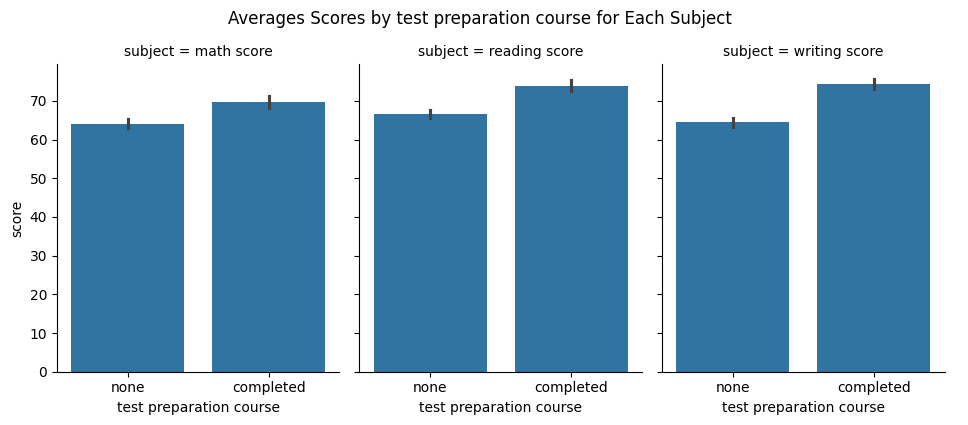

In [8]:
# Test Preparation Course vs Score

df.groupby('test preparation course')[['math score','reading score','writing score']].mean()

# Melt the data to long format
df_melt = df.melt(id_vars='test preparation course', value_vars=['math score', 'reading score', 'writing score'],
                  var_name='subject', value_name='score')

g = sns.catplot(x='test preparation course', y='score', col='subject',
                data=df_melt, kind='bar', height=4, aspect=0.8)
g.fig.suptitle("Averages Scores by test preparation course for Each Subject", y=1.05)
plt.show()

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


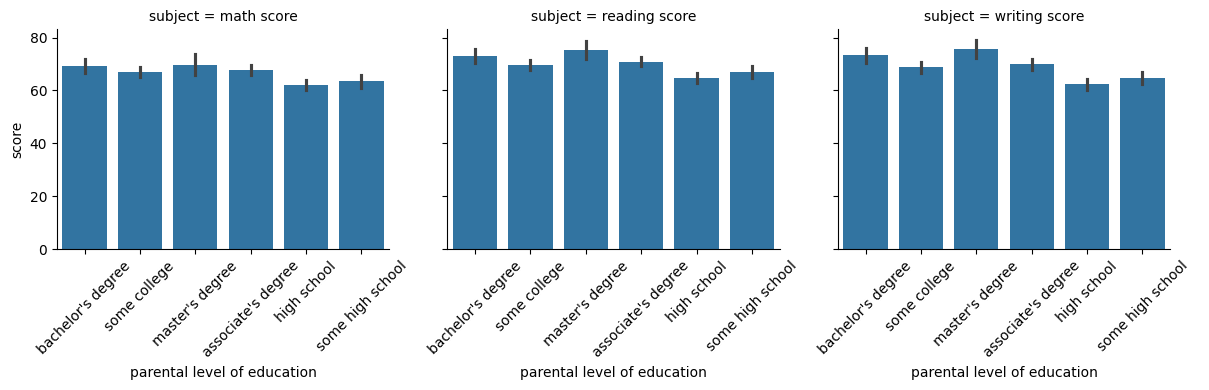

In [ ]:
# parental level of education vs Scores
print(df['parental level of education'].unique())
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().sort_values(by='math score', ascending=False)

df_melt = df.melt(id_vars='parental level of education', value_vars=['math score', 'reading score', 'writing score'],
                  var_name='subject', value_name='score')

# Assuming you're using seaborn and melted dataframe
g = sns.catplot(x='parental level of education', y='score', col='subject',
                data=df_melt, kind='bar', height=4, aspect=1)

# Rotate x-axis labels
g.set_xticklabels(rotation=45)
    
# Optional: add a tighter layout
plt.tight_layout()
plt.show()


<Axes: >

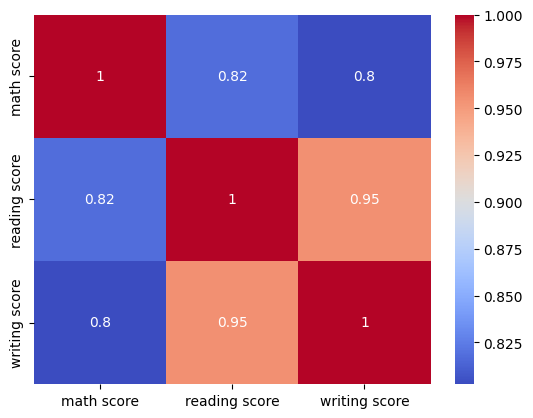

In [11]:
# Correlation (Math vs Reading vs Writing)
df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')

# Values near +1 mean strong positive correlation (e.g., reading & writing usually go together)

In [12]:
# T-test (Gender or Prep course effect on score)

from scipy.stats import ttest_ind

male_scores = df[df['gender'] == 'male']['math score']
female_scores = df[df['gender'] == 'female']['math score']

t_stat, p_val = ttest_ind(male_scores, female_scores)
print("T-Statistic:", t_stat)
print("P-Value:", p_val)


T-Statistic: 5.383245869828983
P-Value: 9.120185549328822e-08


test preparation course  completed  none
gender                                  
female                         184   334
male                           174   308
Chi-Square Statistic: 0.015529201882465888
P-Value: 0.9008273880804724
Degrees of Freedom: 1
Expected Frequencies Table:
 [[185.444 332.556]
 [172.556 309.444]]


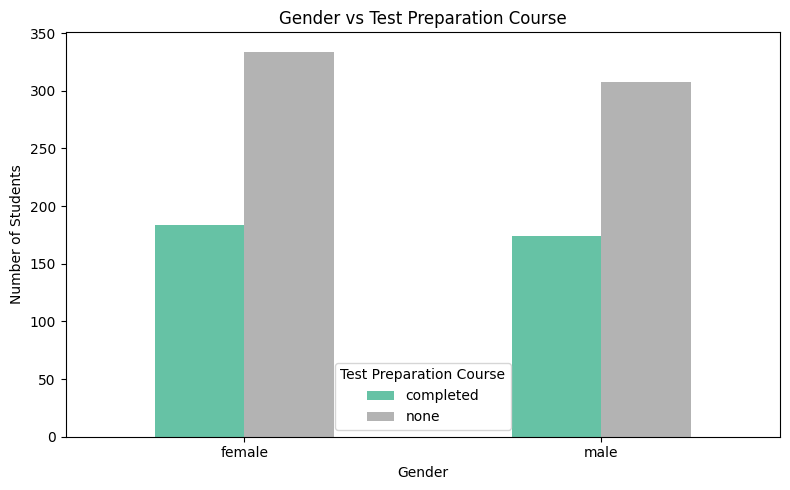

In [13]:
# Chi-Square Test
from scipy.stats import chi2_contingency

table = pd.crosstab(df['gender'], df['test preparation course'])
print(table)

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Plot
table.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')

plt.title('Gender vs Test Preparation Course')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Test Preparation Course')
plt.tight_layout()
plt.show()


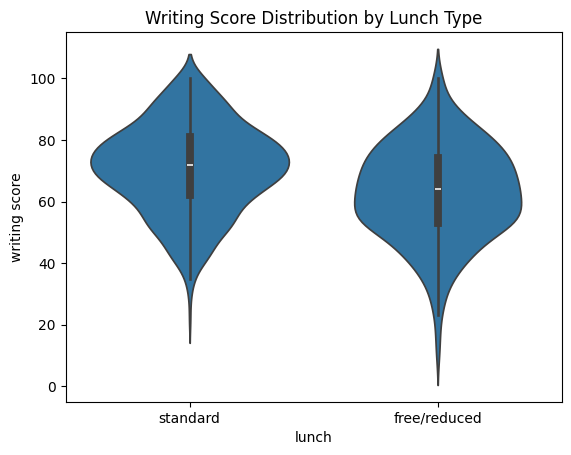

In [14]:
#violin plot

sns.violinplot(data=df, x='lunch', y='writing score')
plt.title('Writing Score Distribution by Lunch Type')
plt.show()
